## Plot images 

In [1]:
import sys
sys.path.insert(
    0,
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification"
)

In [2]:
from cv2 import imread
from matplotlib import pyplot as plt

In [3]:
img = imread(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Images/ImageID_0BGG3W3J.jpg"
)

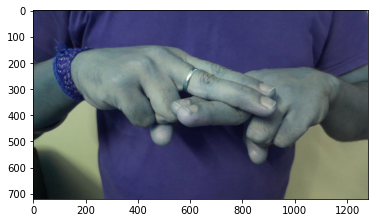

In [4]:
plt.imshow(img)
plt.show()

## EDA

In [5]:
from pandas import read_csv

In [6]:
train = read_csv(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Train.csv",
    header="infer"
)

In [7]:
train.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


<AxesSubplot:>

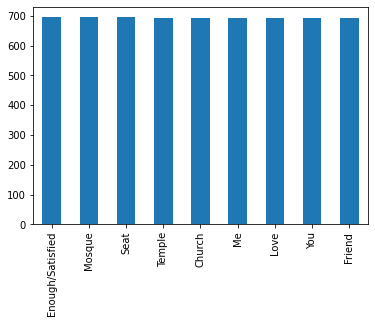

In [8]:
train["Label"].value_counts().plot.bar()

## Dataset

In [9]:
import tensorflow as tf

### TFRecord

In [10]:
from src.data import parse_tfr_element

[0. 0. 0. 0. 0. 0. 0. 0. 1.]
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(9,), dtype=float32)


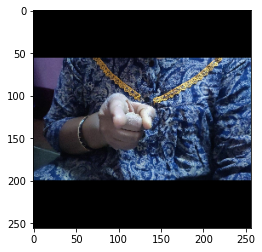

In [27]:
for features, label in tf.data.TFRecordDataset(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/features/Test.tfrecords"
).map(parse_tfr_element).take(1):
    plt.imshow(features)
    print(tf.keras.utils.to_categorical(label, 9))
    print(tf.one_hot(label, 9))

plt.show()

In [12]:
from src.data import split_and_load_data, load_dataset_from_generator, KenyanGenerator

In [13]:
_, x_val, _, y_val = split_and_load_data()

100%|███████████████████████████████████████████████████████████| 6249/6249 [01:15<00:00, 82.63it/s]


In [14]:
type(y_val[0])

numpy.int64

In [15]:
y_val[0]

8

In [16]:
print(f"Taille chemins: {len(x_val)}")
print(f"Taille chemins: {len(x_val)}")

Taille chemins: 1250
Taille chemins: 1250


### Generator

In [17]:
data_generator = KenyanGenerator(data=x_val, labels=y_val, binarize=True, classes=9)
DS = iter(data_generator.generator())

In [18]:
path, label = next(DS)
print(f"Label: {label}")

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Set

In [19]:
data_set = load_dataset_from_generator(
    generator=data_generator, batch=32, shape=224, train=True
)

In [20]:
image, label = next(iter(data_set))

2022-02-07 22:57:43.137050: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [21]:
image.shape

TensorShape([32, 224, 224, 3])

In [22]:
label[4]

<tf.Tensor: shape=(9,), dtype=float16, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float16)>

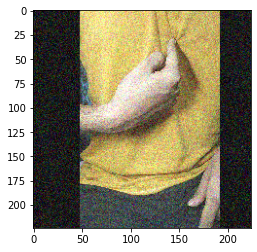

In [23]:
plt.imshow(image[4])
plt.show()

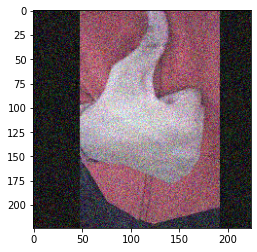

In [24]:
plt.imshow(image[1])
plt.show()